# Home Loans Practice
### Data exploration

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
test = pd.read_csv("C:\\Users\\Andrew\\Documents\\Practice\\Home Loans\\application_test.csv")
train = pd.read_csv("C:\\Users\\Andrew\\Documents\\Practice\\Home Loans\\application_train.csv")
bureau = pd.read_csv("C:\\Users\\Andrew\\Documents\\Practice\\Home Loans\\bureau.csv")
bureau_balance = pd.read_csv("C:\\Users\\Andrew\\Documents\\Practice\\Home Loans\\bureau_balance.csv")
POS_CASH_balance = pd.read_csv("C:\\Users\\Andrew\\Documents\\Practice\\Home Loans\\POS_CASH_balance.csv")
credit_card_balance = pd.read_csv("C:\\Users\\Andrew\\Documents\\Practice\\Home Loans\\credit_card_balance.csv")
previous_application = pd.read_csv("C:\\Users\\Andrew\\Documents\\Practice\\Home Loans\\previous_application.csv")
installments_payments = pd.read_csv("C:\\Users\\Andrew\\Documents\\Practice\\Home Loans\\installments_payments.csv")

In [3]:
print("THere are " + str(np.sum(train.TARGET == 1)) +" loans in trouble and " +str(np.sum(train.TARGET == 0)) + " Loan that are not.")

THere are 24825 loans in trouble and 282686 Loan that are not.


Lets look at the first row of the training dataset

In [5]:
train.iloc[0]

SK_ID_CURR                                           100002
TARGET                                                    1
NAME_CONTRACT_TYPE                               Cash loans
CODE_GENDER                                               M
FLAG_OWN_CAR                                              N
FLAG_OWN_REALTY                                           Y
CNT_CHILDREN                                              0
AMT_INCOME_TOTAL                                     202500
AMT_CREDIT                                           406598
AMT_ANNUITY                                         24700.5
AMT_GOODS_PRICE                                      351000
NAME_TYPE_SUITE                               Unaccompanied
NAME_INCOME_TYPE                                    Working
NAME_EDUCATION_TYPE           Secondary / secondary special
NAME_FAMILY_STATUS                     Single / not married
NAME_HOUSING_TYPE                         House / apartment
REGION_POPULATION_RELATIVE              

In [12]:
train.shape

(307511, 122)

So there are 122 columns in this dataset. Let's take a look at a few of them and see if anything pops out.
First lets look at the number of children each person recieving a loan has.

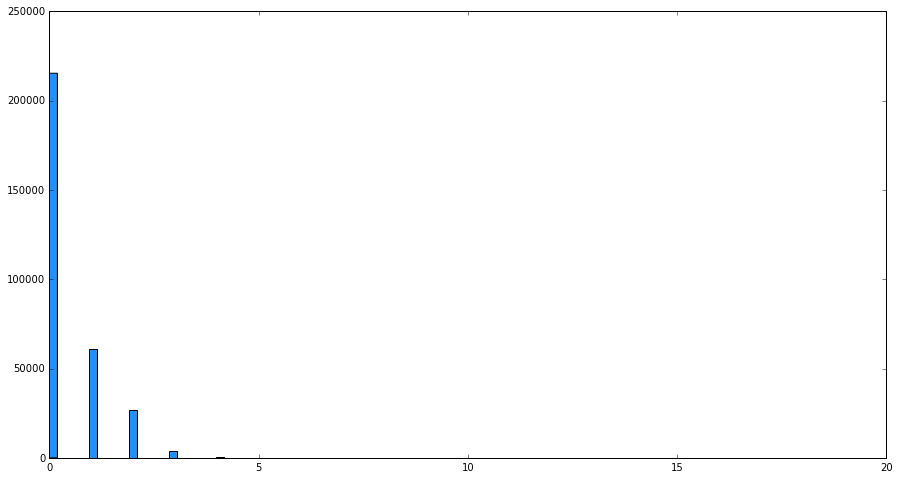

In [17]:
plt.figure(figsize = (15,8))
plt.hist(train['CNT_CHILDREN'],bins=100,facecolor='dodgerblue')
plt.show()

Here we can see that the majority of people getting loans have no children while a decent amount have 1 or 2 children. Not a lot of variablity but let's take a look at how this relates to our target variable.

In [30]:
print(train.loc[train.TARGET == 1]['CNT_CHILDREN'].value_counts(normalize=True))
print(train.loc[train.TARGET == 0]['CNT_CHILDREN'].value_counts(normalize=True))

0     0.669043
1     0.219698
2     0.093978
3     0.014421
4     0.002216
5     0.000282
6     0.000242
9     0.000081
11    0.000040
Name: CNT_CHILDREN, dtype: float64
0     0.703119
1     0.196915
2     0.086371
3     0.011882
4     0.001323
5     0.000272
6     0.000053
7     0.000025
14    0.000011
19    0.000007
12    0.000007
10    0.000007
8     0.000007
Name: CNT_CHILDREN, dtype: float64


Lets take a look at occupation type

In [11]:

print(train.loc[train.TARGET == 1].groupby('OCCUPATION_TYPE').SK_ID_CURR.nunique())
print(train.loc[train.TARGET == 0].groupby('OCCUPATION_TYPE').SK_ID_CURR.nunique())

OCCUPATION_TYPE
Accountants               474
Cleaning staff            447
Cooking staff             621
Core staff               1738
Drivers                  2107
HR staff                   36
High skill tech staff     701
IT staff                   34
Laborers                 5838
Low-skill Laborers        359
Managers                 1328
Medicine staff            572
Private service staff     175
Realty agents              59
Sales staff              3092
Secretaries                92
Security staff            722
Waiters/barmen staff      152
Name: SK_ID_CURR, dtype: int64
OCCUPATION_TYPE
Accountants               9339
Cleaning staff            4206
Cooking staff             5325
Core staff               25832
Drivers                  16496
HR staff                   527
High skill tech staff    10679
IT staff                   492
Laborers                 49348
Low-skill Laborers        1734
Managers                 20043
Medicine staff            7965
Private service staff    

I really am not sure what I am doing here.

In [4]:
mask = np.random.permutation(train.shape[0])
train1 = train.iloc[mask[0:int(train.shape[0]*.8)]].copy()
test1 = train.iloc[mask[int(train.shape[0]*.8):]].copy()

In [5]:
# I wanted to add names to the columns but the first column this returns is for missing values.
# Not sure what I should do with missing values so I'm just keeping them in shouldn't be much of a problem
def hot_fix(column):
        names = list(column[1])
        column = column[0]
        u = np.unique(column)
        if -1 in u:
            names = ["nan"] + names
        res = np.zeros((column.shape[0],u.shape[0]))
        for i in range(u.shape[0]):
            res[0:,i] = column == u[i]
        res = pd.DataFrame(res)
        res.columns = names
        return res
hot_fix(train['OCCUPATION_TYPE'].factorize()).shape


(307511, 19)

In [6]:
# Have to reset index since the oc type didnt keep the original index and concat combines based on index apparently
oc_type = pd.DataFrame(hot_fix(train1['OCCUPATION_TYPE'].factorize()))
train2 = pd.concat([train1.reset_index(drop=True),oc_type],axis =1)
oc_type2 = pd.DataFrame(hot_fix(test1['OCCUPATION_TYPE'].factorize()))
test2 = pd.concat([test1.reset_index(drop=True),oc_type2],axis =1)

In [7]:
factors = ['CNT_CHILDREN'] + list(oc_type.columns)

In [12]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(train2[factors], train2['TARGET'])
y_ = regr_1.predict(test2[factors])

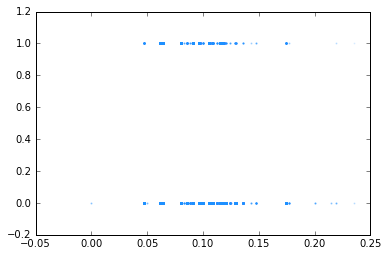

AUC: 0.572103546022


In [13]:
plt.figure()
plt.scatter(y_,test1['TARGET'],s=1, alpha = 0.1,color="dodgerblue")
plt.show()
print("AUC:",sk.metrics.roc_auc_score(test1['TARGET'],y_))

In [15]:
from sklearn.tree import DecisionTreeClassifier
regr_1 = DecisionTreeClassifier(max_depth=10)
regr_1.fit(train2[factors], train2['TARGET'])
y_ = regr_1.predict(test2[factors])
y_prob = regr_1.predict_proba(test2[factors])

In [20]:
print("AUC:",sk.metrics.roc_auc_score(test1['TARGET'],y_prob[0:,1]))

AUC: 0.572103546022


In [18]:
y_prob

array([[ 0.93809678,  0.06190322],
       [ 0.90344079,  0.09655921],
       [ 0.90222772,  0.09777228],
       ..., 
       [ 0.92007245,  0.07992755],
       [ 0.93809678,  0.06190322],
       [ 0.90906117,  0.09093883]])

come up with predictions for the test dataset

In [121]:
oc_type = pd.DataFrame(hot_fix(test['OCCUPATION_TYPE'].factorize()))
test2 = pd.concat([test.reset_index(drop=True),oc_type],axis =1)

In [123]:
y_ = regr_1.predict(test2[factors])

In [133]:
res = pd.concat([pd.DataFrame(test.SK_ID_CURR).reset_index(drop=True),pd.DataFrame(y_)],axis = 1)
res.columns = ['SK_ID_CURR','TARGET']
res.to_csv("HomeLoan1.csv",header= True,index = False)

In [129]:
res

,SK_ID_CURR,TARGET
0,100001,0.062141
1,100005,0.181338
2,100013,0.112028
3,100028,0.108358
4,100038,0.081912
5,100042,0.112028
6,100057,0.064334
7,100065,0.062141
8,100066,0.062141
9,100067,0.096649


In [10]:
from sklearn.ensemble import GradientBoostingClassifier
regr_1 = GradientBoostingClassifier()
regr_1.fit(train2[factors], train2['TARGET'])
y_ = regr_1.predict(test2[factors])
y_proba = regr_1.predict_proba(test2[factors])

In [21]:
y_proba = regr_1.predict_proba(test2[factors])
print("AUC:",sk.metrics.roc_auc_score(test1['TARGET'],y_proba[0:,1]))

AUC: 0.572103546022
